#  South African Language Identification Hack 2022
## <span style="color:red"> Ubong Ben </span>




# Introduction

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

The country is multilingual with 11 official languages, each of which is guaranteed equal status. Most South Africans are multilingual and able to speak at least two or more of the official languages.



With such a multilingual population, it is only obvious that our systems and devices also communicate in multi-languages.

In this challenge, you will take text which is in any of South Africa's 11 Official languages and identify which language the text is in. This is an example of NLP's Language Identification, the task of determining the natural language that a piece of text is written in.

### Statement of Problem

Due to the multilingual nature of the South-African population, it is necessary for systems and devices used by the country to communicate with each other. For easy interpretation, it is necessary identify the language used in communication within the system.


###  Aim of the Project

- The aim of the project is to deciphipher the south african language (out of 11 official languages) that a piece is written in given the text.


<img src="https://www.awesomesouthafrica.co.za/wp-content/uploads/2014/06/mt.jpg">



<a id="cont"></a>
# Table of contents:
1. <a href=#one>Importing Packages</a>

2. <a href=#two>Loading data</a>

3. <a href=#three>Exploratory data analysis</a>

4. <a href=#four>Data Engineering</a>

5. <a href=#five>Modelling</a>

6. <a href=#six>Model Performance</a>

7. <a href=#seven>Conclusion and Recommendations</a>

   <a href=#ref>References</a>



<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Importing Packages ⚡ |
| :--------------------------- |
| In this section, the team will import the necessary libraries that will be used throughout analysis and modelling. |


In [1]:
#conventional libraries
import pandas as pd
import numpy as np
import re

#natural language tools
import nltk
from nltk import TreebankWordTokenizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample


# Building classification models
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, GaussianNB, ComplementNB, CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score


#plotting tools
import seaborn as sns
import matplotlib.style as style
style.use('seaborn-pastel')
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud

#to clip some ugly looking warnings
import warnings
warnings.simplefilter("ignore")

<a id="two"></a>
## 2. Loading the Data
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Loading the data ⚡ |
| :--------------------------- |
| In this section, the team will load train and test data into a DataFrame. |

---

In [2]:
#Load train data
train = pd.read_csv('train_set.csv')

#Load test data
test = pd.read_csv('test_set.csv')

<a id="three"></a>
## 3. Data Cleaning & Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description:  ⚡ |
| :--------------------------- |
| In this section, the team will clean the dataset and perform and indepth analysis of all the variables in the DataFrame. |

---


### *No data is clean but most is useful.*
### - Dean Abbot

<img src="https://dpbnri2zg3lc2.cloudfront.net/en/wp-content/uploads/2021/01/data-quotes.jpg">

In [3]:
# How is the general picture of our dataset?

print(train.shape)
print(test.shape)

display(train.head())
display(test.head())



(33000, 2)
(5682, 2)


,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


From the peek at the dataset, it can be observed that the train data contains over 33,000 tweets. That is quite sufficient for our machine learning activity. The test data looks consistent with the train set.

The description says that we are looking at 11 languages. Let us confirm that. Its data afterall..


In [4]:
print('List of languages: ',list(train['lang_id'].unique()))
print('Number of classes: ',len(train['lang_id'].unique()))

List of languages:  ['xho', 'eng', 'nso', 'ven', 'tsn', 'nbl', 'zul', 'ssw', 'tso', 'sot', 'afr']
Number of classes:  11


#### Class distribution: 

Now that we know that our data contains eleven classes, let us take a closer look at how the data are distributed across these  classes. 

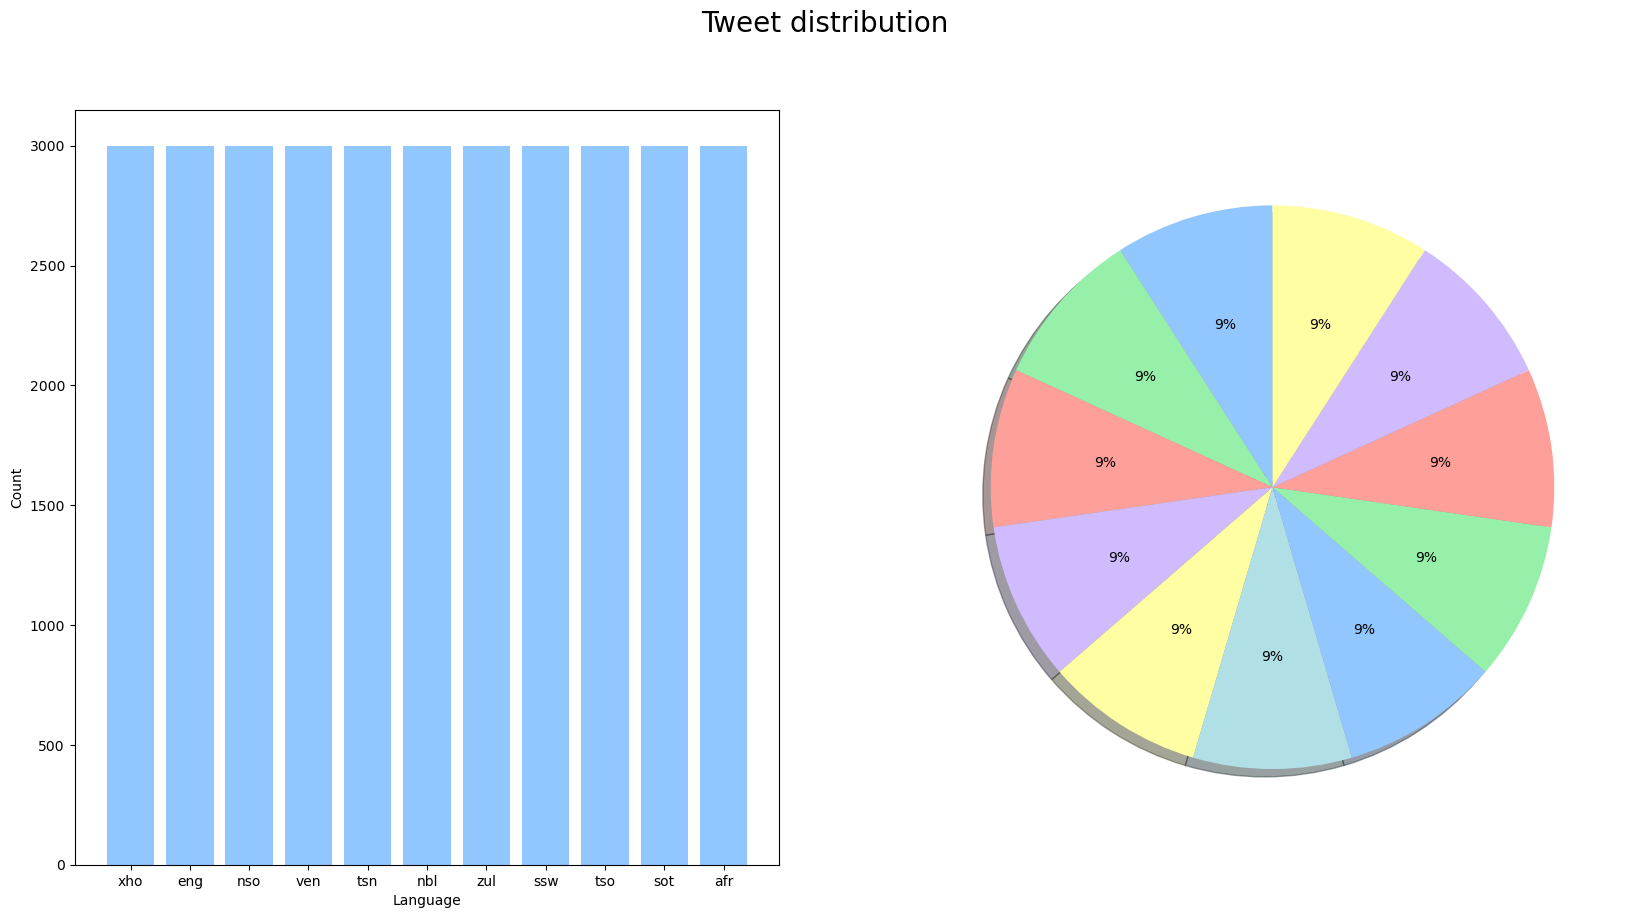

In [5]:
# Display target distribution
style.use('seaborn-pastel')

fig, axes = plt.subplots(ncols=2, 
                         nrows=1, 
                         figsize=(20, 10), 
                         dpi=100)

axes[0].bar(list(train['lang_id'].unique()),train['lang_id'].value_counts(), )
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Language')

axes[1].pie(train['lang_id'].value_counts(),
            #labels=['Pro', 'News', 'Neutral', 'Anti'],
            autopct='%1.0f%%',
            shadow=True,
            #colors=['red','blue','green','yellow'],
            startangle=90,
           # explode = (0.1, 0.1, 0.1, 0.1)
           )

fig.suptitle('Tweet distribution', fontsize=20)
plt.show()

#### Legnth of sentence: 
It is understood in linquistics that some languages are more expressive than other languages i.e while some languages may have long sentences, the same sentence can be expressed in another language in a shorter manner. This feature can help one decipher the language being use. 

Let us investigate the legnth of sentences in each of our language class

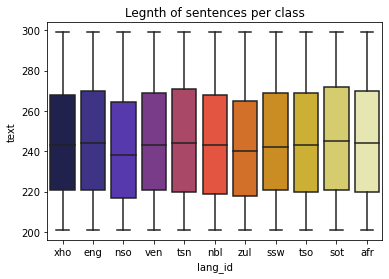

In [6]:
#get the legnth of each tweet in the message column
legnth = train['text'].str.len()

# Compile the legnth of the tweets per class and plot a distribution of the length 
#using a box plot
sns.boxplot(x=train['lang_id'], y=legnth, data=train, palette='CMRmap')
plt.title('Legnth of sentences per class')
plt.show()


*It seems that all the languages have similarly-legnthed sentences!! That was unexpected but still acceptable.*


<a id="subsection-three"></a>
#### Top words
The machine learning tool that will be developed in this project is based on language and words. Words make languages unique. While this is a local language project, lets take a out-of-bracket example. If words like 'Monsier' and 'Bonjour' are found in a sentence, it is more probable that the sentence was written in french than in english. 

We would like to know the top words used across the various classes. 

However before we can achieve this [<a href=#pw>click here if you wish to check this out right away</a>], we must make some adjustments to the features in our dataset.

Lets do some engineering!!!

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---

#### Where there is data smoke, there is business fire...
##### - Thomos Redman
    
| ⚡ Description: Data engineering ⚡ |
| :--------------------------- |
| In this section, the team will restructure the data for the project purpose... |

---

First, it must be said that we do not understand how the data was gathered. Maybe through web-scraping or other means.
Howbeit and to be safe, we will assume that the data contains snooky and spooky characters which may stand as noise.

Let us remove them.

In [7]:
cleaned_text = []
# iterating through the sentences
for sentence in  train['text']:
        # symbols and numbers 
        sentence = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', sentence)
        sentence = re.sub(r'[[]]', ' ', sentence)
        # converting  sentence to lower case
        sentence = sentence.lower()
        # appending to cleaned_text
        cleaned_text.append(sentence)

Great. Our data is free of messy inputs. 

Alright, now thats out of the way.
We would want to perform tokenization. 

If we must recall,
Tokenization divides text into a sequence of 'words'.

### Tokenisation

In [8]:
tokeniser = TreebankWordTokenizer()
train['text'] = train['text'].apply(tokeniser.tokenize)

train.head()

,lang_id,text
0,xho,"[umgaqo-siseko, wenza, amalungiselelo, kumazik..."
1,xho,"[i-dha, iya, kuba, nobulumko, bokubeka, umsebe..."
2,eng,"[the, province, of, kwazulu-natal, department,..."
3,nso,"[o, netefatša, gore, o, ba, file, dilo, ka, mo..."
4,ven,"[khomishini, ya, ndinganyiso, ya, mbeu, yo, ew..."


<a id="pw"></a>
### Popular Words
Words used by tweeter are windows into customer thoughts. The importance of popular words in this project has been explained earlier.

In [9]:
def frequency(text):
    
    """
    This function determines the frequency of each word in a collection of text 
    and stores the  most frequent words in a dataframe, 
    sorted from most to least frequent
    
    Input: 
    text: original text
           datatype: 'str'
           
    Output: 
    frequency: dataframe containing the top  words 
               datatype: dataframe          
    """
    words=text
    words=words.apply(lambda x: ' '.join(x))

    
    # Count vectorizer excluding english stopwords
    cv = CountVectorizer()
    words = cv.fit_transform(words)
    
    # Count the words in the tweets and determine the frequency of each word
    sum_words = words.sum(axis=0)
    words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    
    # Create a dataframe to store the top 25 words and their frequencies
    frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
    frequency = frequency.head(25)
    
    return frequency


In [10]:
# Obtain the top frequently-mentioned words in all the classes
eng_frequency = frequency(train['text'][train['lang_id']=='eng'])
xho_frequency = frequency(train['text'][train['lang_id']=='xho'])
nso_frequency = frequency(train['text'][train['lang_id']=='nso'])
ven_frequency = frequency(train['text'][train['lang_id']=='ven'])
tsn_frequency = frequency(train['text'][train['lang_id']=='tsn'])
nbl_frequency = frequency(train['text'][train['lang_id']=='nbl'])
zul_frequency = frequency(train['text'][train['lang_id']=='zul'])
ssw_frequency = frequency(train['text'][train['lang_id']=='ssw'])
tso_frequency = frequency(train['text'][train['lang_id']=='tso'])
sot_frequency = frequency(train['text'][train['lang_id']=='sot'])
afr_frequency = frequency(train['text'][train['lang_id']=='afr'])

eng_words = ' '.join([text for text in eng_frequency['word']])
xho_words = ' '.join([text for text in xho_frequency['word']])
nso_words = ' '.join([text for text in nso_frequency['word']])
ven_words = ' '.join([text for text in ven_frequency['word']])
tsn_words = ' '.join([text for text in tsn_frequency['word']])
nbl_words = ' '.join([text for text in nbl_frequency['word']])
zul_words = ' '.join([text for text in zul_frequency['word']])
ssw_words = ' '.join([text for text in ssw_frequency['word']])
tso_words = ' '.join([text for text in tso_frequency['word']])
sot_words = ' '.join([text for text in sot_frequency['word']])
afr_words = ' '.join([text for text in afr_frequency['word']])


# Create a wordcloud of the words per class
eng_wordcloud = WordCloud(width=800, 
                           height=500, 
                           random_state=10, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Reds").generate(eng_words)
xho_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(xho_words)

nso_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(nso_words)
ven_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(ven_words)
tsn_wordcloud = WordCloud(width=800, 
                           height=500, 
                           random_state=110, 
                           max_font_size=110, 
                           background_color='white',
                           colormap="Reds").generate(tsn_words)
nbl_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(nbl_words)

zul_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(zul_words)
ssw_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(ssw_words)
tso_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=73, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Greens").generate(tso_words)

sot_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=0, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Blues").generate(sot_words)
afr_wordcloud = WordCloud(width=800, 
                          height=500, 
                          random_state=10, 
                          max_font_size=110, 
                          background_color='white',
                          colormap="Oranges").generate(afr_words)

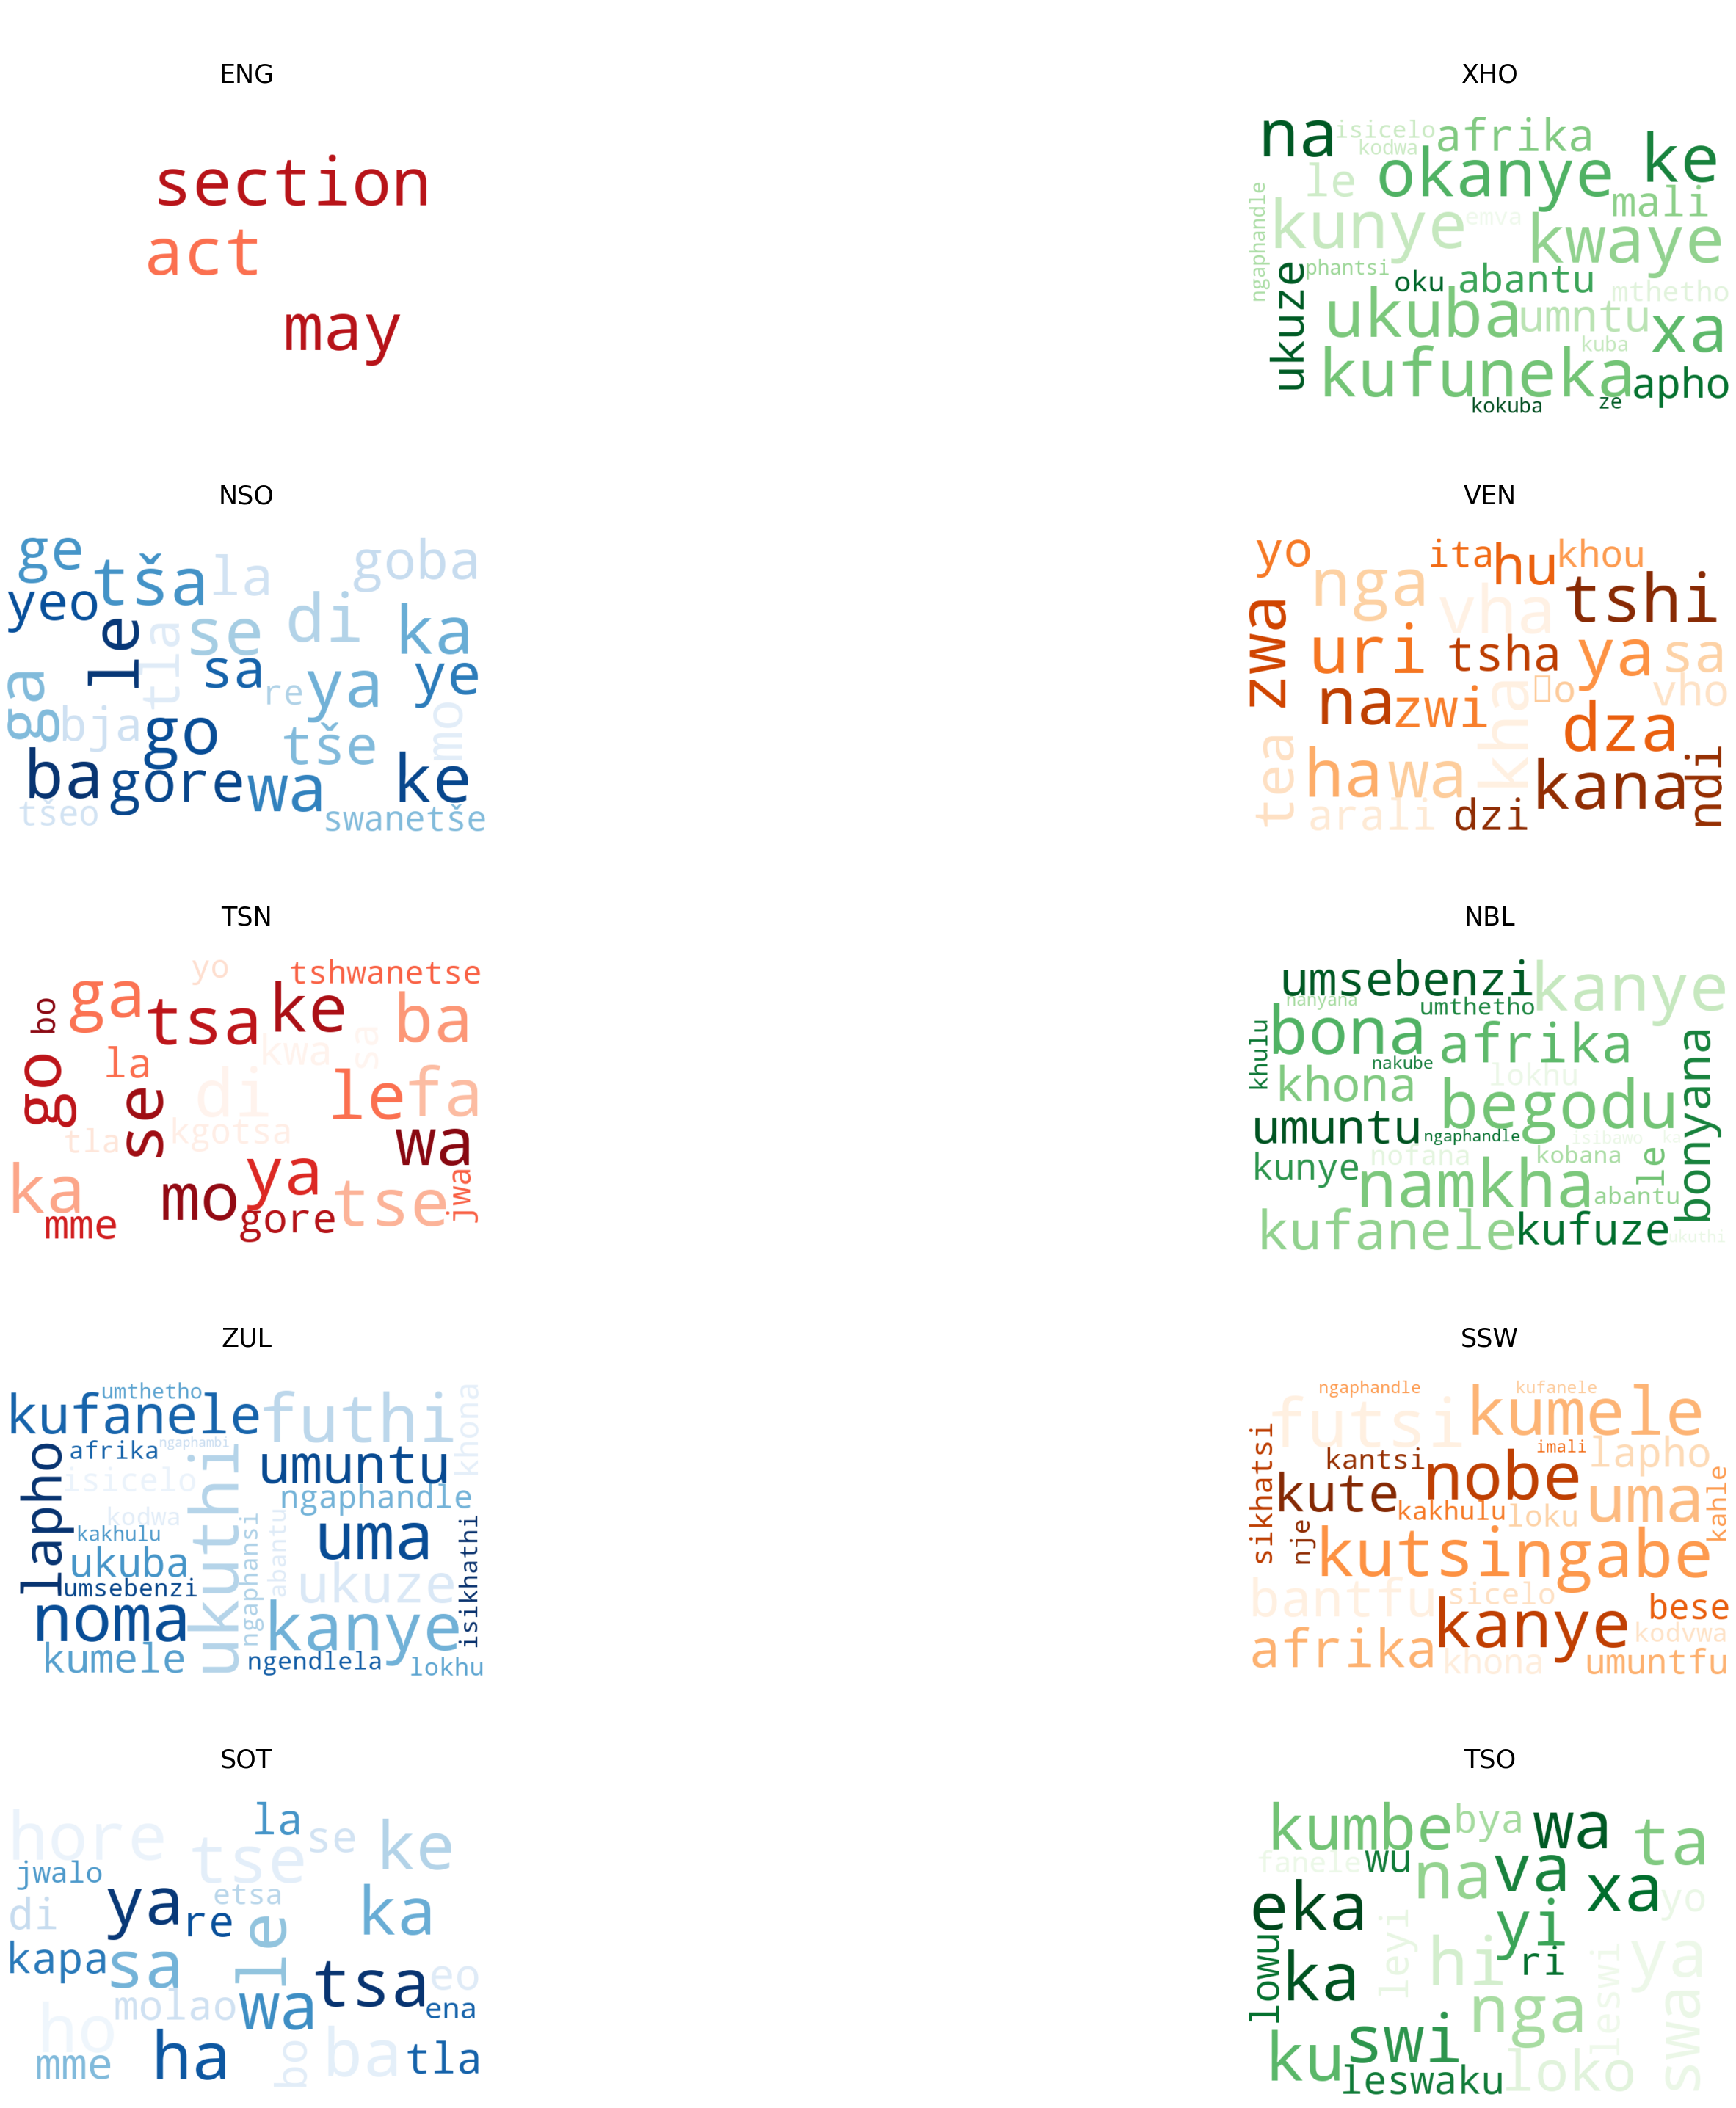

In [11]:
# Plot pro and anti wordclouds next to one another for comparisson
f, axarr = plt.subplots(5,2, figsize=(60,40))
axarr[0,0].imshow(eng_wordcloud, interpolation="bilinear")
axarr[0,1].imshow(xho_wordcloud, interpolation="bilinear")
axarr[1,0].imshow(nso_wordcloud, interpolation="bilinear")
axarr[1,1].imshow(ven_wordcloud, interpolation="bilinear")
axarr[2,0].imshow(tsn_wordcloud, interpolation="bilinear")
axarr[2,1].imshow(nbl_wordcloud, interpolation="bilinear")
axarr[3,0].imshow(zul_wordcloud, interpolation="bilinear")
axarr[3,1].imshow(ssw_wordcloud, interpolation="bilinear")
axarr[4,1].imshow(tso_wordcloud, interpolation="bilinear")
axarr[4,0].imshow(sot_wordcloud, interpolation="bilinear")
for a in f.axes:
    plt.sca(a)
    plt.axis('off')
    
axarr[0,0].set_title('\n\nENG\n', fontsize=35)
axarr[0,1].set_title('\n\nXHO\n', fontsize=35)
axarr[1,0].set_title('\n\nNSO\n', fontsize=35)
axarr[1,1].set_title('\n\nVEN\n', fontsize=35)
axarr[2,0].set_title('\n\nTSN\n', fontsize=35)
axarr[2,1].set_title('\n\nNBL\n', fontsize=35)
axarr[3,0].set_title('\n\nZUL\n', fontsize=35)
axarr[3,1].set_title('\n\nSSW\n', fontsize=35)
axarr[4,1].set_title('\n\nTSO\n', fontsize=35)
axarr[4,0].set_title('\n\nSOT\n', fontsize=35)


plt.tight_layout()
plt.show()


### Label Encoding
It can be observed that the labels - the name of languages is categorical. Before training the model is conducted, we would have to convert it into  numerical form.
To achieve this, we would be performing label encoding on the features. 

In [12]:
encoder = LabelEncoder()
label = encoder.fit_transform(train['lang_id'])

### Bag of Words

It is not just the labels that are categorical but also features too. Th input feature should also be of the numerical form. 
So we will also convert the text sentences into numerical form. We will nevertheless, be using CountVectorizer.

In [13]:
train['text']=train['text'].apply(lambda x: ' '.join(x))
cv = CountVectorizer()
c= cv.fit(train['text'])

features=c.transform(train['text'])#.toarray()
features=features.astype(np.uint8)

<a id="five"></a>
## 5. Modelling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

---
    
| ⚡ Description: Modelling ⚡ |
| :--------------------------- |
| In this section,the team would design models for the classification task. |

---

In this stage, we will classification models for the task. The models to be considered will be:

+ Logistic regression model
+ SVC model
+ Random forest model
+ Naive Bayes model
+ KNN model


## Logistic regression classification
Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes.


Logistic Regression uses the probability of a data point to belonging to a certain class to classify each datapoint to it's best estimated class

It is one of the simplest ML algorithms that can be used for various classification problems

The figure below is the sigmoid function logistic regression models use to make predictions:


<img src="https://miro.medium.com/max/499/0*ENkZ5v28CDzuaoYU.png">


## Support Vector classification model
In the SVM algorithm, we plot each data item as a point in n-dimensional space (where n is number of features you have) with the value of each feature being the value of a particular coordinate. The goal of the SVM algorithm is to create the best line or decision boundary that can seperate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a hyperplane.

SVM chooses the extreme points/vectors that help in creating the hyperplane. These extreme cases are called as support vectors. Consider the below diagram in which there are two different categories that are classified using a decision boundary or hyperplane:

![support-vector-machine-algorithm.png](https://static.javatpoint.com/tutorial/machine-learning/images/support-vector-machine-algorithm.png)

## Random forest classification
Random forests or random decision forests is an ensemble learning method for classification that operates by constructing a multitude of decision trees at training time. 

The following diagram is a visual representation of the random forest classification method:

<img src="https://static.javatpoint.com/tutorial/machine-learning/images/random-forest-algorithm2.png">

## Naive Bayes classification
Naive Bayes is a classification algorithm that uses the principle of Bayes theorem to make classifications and assumes independent variables to be statistically independent from each other .

Bayes Theorem:

$$ P(A \mid B) = \frac{P(B \mid A) * P(A)}{P(B)}$$

* P(A|B) is the posterior probability of class (A, target) given predictor (B, attributes).

* P(A) is the prior probability of class.

* P(B|A) is the likelihood which is the probability of the predictor given class.

* P(B) is the prior probability of the predictor.

<img src="https://hands-on.cloud/wp-content/uploads/2022/01/Implementing-Naive-Bayes-Classification-using-Python.png">


### Train - Test split
Before we pass our data through our custom pipelines we have to split our train data into a train and test set. This will allow us to independently evaluate our model performance without bias. We wish to reserved 80% of a randomly selected section of the data for training.

In [14]:
# Split the train data to create validation dataset
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.20, random_state=25)

With the train data delineated from the test data, we will now build our model

In [15]:
# Logistic Regression model
log_reg = LogisticRegression(C=1, class_weight='balanced', 
                                         max_iter=1000)
# Linear SVC model
linear_svc = LinearSVC(class_weight='balanced')

# Random Forest Classifier
ran_forest = RandomForestClassifier(max_depth=5, n_estimators=100)

# Naïve Bayes model
n_bayes =  MultinomialNB()

# KNN Classifier model
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', 
                                             p=2)

Right!! Lets do some training and predictions

In [16]:
# Logistic Regression
log_reg.fit(X_train, y_train)
y_pred_Log = log_reg.predict(X_test)

# Linear Support vector classifier
linear_svc.fit(X_train, y_train)
y_pred_svc = linear_svc.predict(X_test)

# Random forest model
ran_forest.fit(X_train, y_train)
y_pred_RF = ran_forest.predict(X_test)

# Naive Bais model
n_bayes.fit(X_train, y_train)
y_pred_bayes = n_bayes.predict(X_test)


# KNN model
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


<a id="six"></a>
# 6. Model Performance    
 
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

The performance of each model will be evaluated based on the precision, accuracy and F1 score achieved when the model is used to predict the classes for the validation data. We will be looking at the following to determine and visualize these metrics:
- Classification report 
- Confusion matrix

The best model will be selected based on the weighted F1 score. 

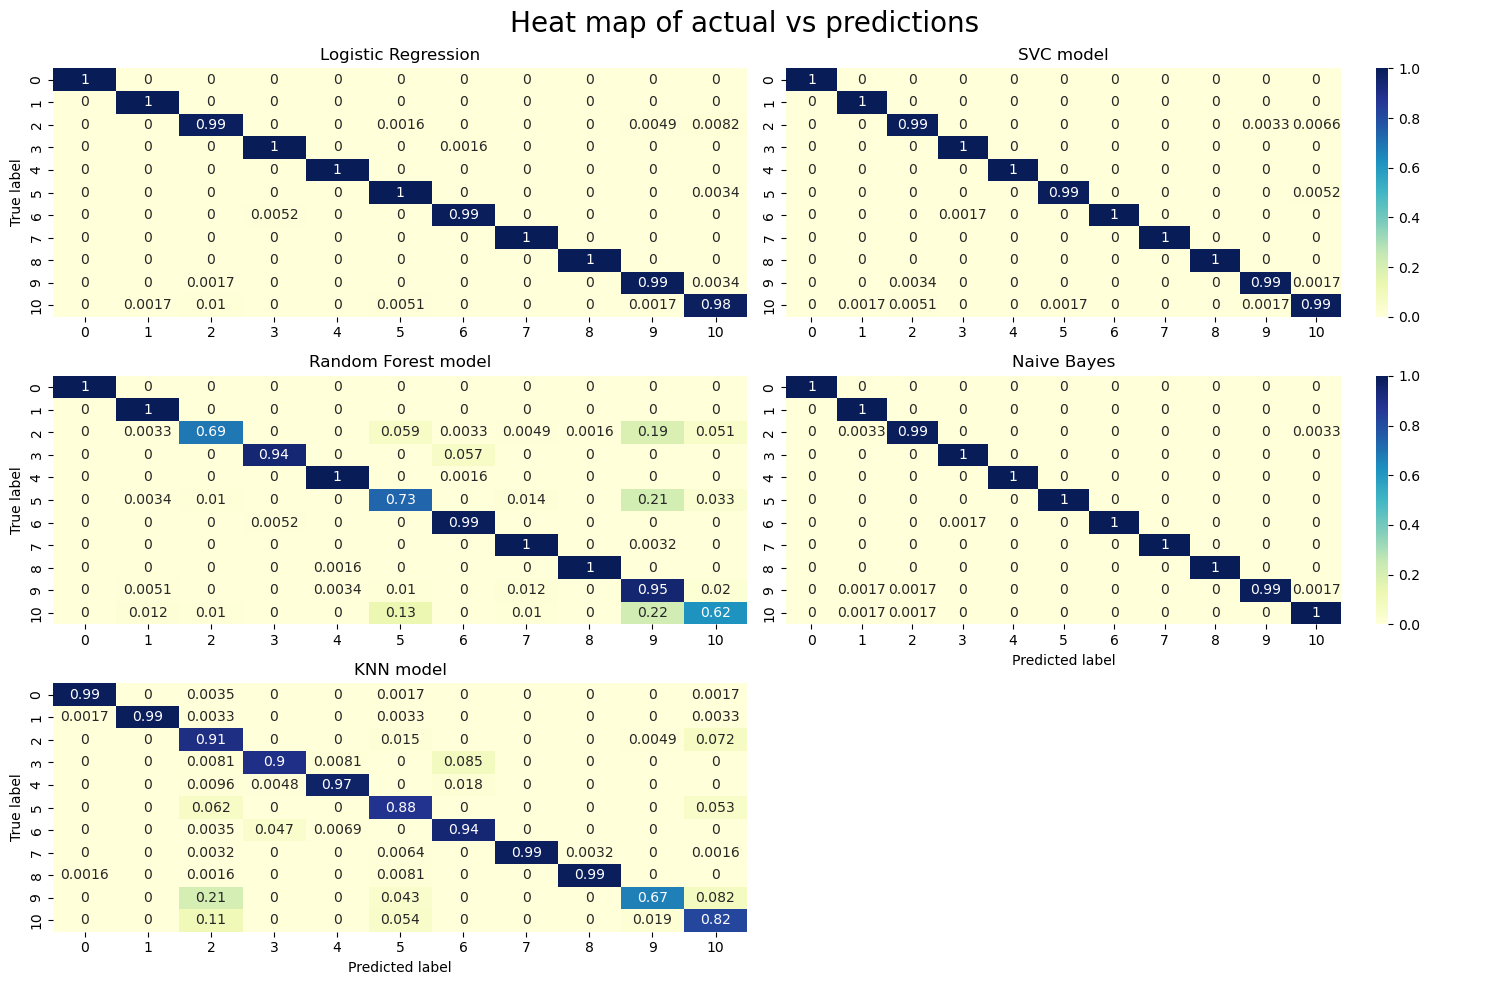

In [17]:
fig, axes = plt.subplots(ncols=2, 
                         nrows=3, 
                         figsize=(15, 10), 
                         dpi=100)

# Generate a normalized confusion matrix
cm = confusion_matrix(y_test, y_pred_Log)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

# Display the confusion matrix as a heatmap
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=log_reg.classes_, 
            yticklabels=log_reg.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, cbar = False,
            ax=axes[0,0])
axes[0,0].set_ylabel('True label')
axes[0,0].set_title('Logistic Regression')

#repeated for other four axes
cm = confusion_matrix(y_test, y_pred_svc)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=linear_svc.classes_, 
            yticklabels=linear_svc.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, 
            ax=axes[0,1])
axes[0,1].set_title('SVC model')

cm = confusion_matrix(y_test, y_pred_RF)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=ran_forest.classes_, 
            yticklabels=ran_forest.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, cbar = False,
            ax=axes[1,0])
axes[1,0].set_ylabel('True label')
axes[1,0].set_title('Random Forest model')

cm = confusion_matrix(y_test, y_pred_bayes)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=n_bayes.classes_, 
            yticklabels=n_bayes.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, 
            ax=axes[1,1])
axes[1,1].set_xlabel('Predicted label')
axes[1,1].set_title('Naive Bayes')

cm = confusion_matrix(y_test, y_pred_knn)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
sns.heatmap(cm_norm, 
            cmap="YlGnBu", 
            xticklabels=knn.classes_, 
            yticklabels=knn.classes_, 
            vmin=0., 
            vmax=1., 
            annot=True, 
            annot_kws={'size':10}, ax=axes[2,0], cbar = False,)
axes[2,0].set_ylabel('True label')
axes[2,0].set_xlabel('Predicted label')
axes[2,0].set_title('KNN model')

axes[2,1].axis("off")


fig.suptitle('Heat map of actual vs predictions', fontsize=20)

plt.tight_layout()
plt.show()




That is actually a lot of colors. Lets look at the numbers..

In [18]:
#create empty list to contain a dataframe of each of accuracy, precision, recall and f1 errors; 
#then concatenate the dataframes
judgement=[]
judgement.append(pd.DataFrame({'Model':['Logistic Regression','SVC','Random Forest','Naive Bayes', 'KNN']}))
judgement.append(pd.DataFrame({'Accuracy':[metrics.accuracy_score(y_test, y_pred_Log), metrics.accuracy_score(y_test, y_pred_svc), metrics.accuracy_score(y_test, y_pred_RF),metrics.accuracy_score(y_test, y_pred_bayes),metrics.accuracy_score(y_test, y_pred_knn)]}))
judgement.append(pd.DataFrame({'Precision':[metrics.precision_score(y_test, y_pred_Log, average='micro'), metrics.precision_score(y_test, y_pred_svc, average='micro'), metrics.precision_score(y_test, y_pred_RF, average='micro'),metrics.precision_score(y_test, y_pred_bayes, average='micro'),metrics.precision_score(y_test, y_pred_knn, average='micro')]}))
judgement.append(pd.DataFrame({'Recall':[metrics.recall_score(y_test, y_pred_Log, average='micro'), metrics.recall_score(y_test, y_pred_svc, average='micro'), metrics.recall_score(y_test, y_pred_RF, average='micro'),metrics.recall_score(y_test, y_pred_bayes, average='micro'),metrics.recall_score(y_test, y_pred_knn, average='micro')]}))
judgement.append(pd.DataFrame({'F1':[metrics.f1_score(y_test, y_pred_Log, average='micro'), metrics.f1_score(y_test, y_pred_svc, average='micro'), metrics.f1_score(y_test, y_pred_RF, average='micro'),metrics.f1_score(y_test, y_pred_bayes, average='micro'),metrics.f1_score(y_test, y_pred_knn, average='micro')]}))

judgement=pd.concat(judgement, axis=1)


judgement.set_index('Model', inplace= True)
print(judgement)


                     Accuracy  Precision    Recall        F1
Model                                                       
Logistic Regression  0.995606   0.995606  0.995606  0.995606
SVC                  0.997121   0.997121  0.997121  0.997121
Random Forest        0.902121   0.902121  0.902121  0.902121
Naive Bayes          0.998485   0.998485  0.998485  0.998485
KNN                  0.914091   0.914091  0.914091  0.914091


<BarContainer object of 5 artists>

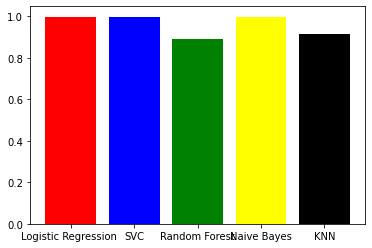

In [19]:
plt.bar(['Logistic Regression ', 'SVC', 'Random Forest', 'Naive Bayes', 'KNN'],[0.9956,0.997121,0.888636,0.998485,0.914091 ], color=['red','blue','green','yellow','black'])


### Observation:
##### It is obvious from the table, bar graph and heat map that the  Naive Bayes  achieved the best metrics score  0.999 across of metric indices while Random forest perfromed worst . The Naive Bayes model is therefore our model of choice for this project.


### Hyperparameter tuning 

In [27]:
model_ber, model_com=BernoulliNB(), ComplementNB(), 
# Bernoulli version
model_ber.fit(X_train, y_train)
y_pred_ber = model_ber.predict(X_test)

# ComplementNB
model_com.fit(X_train, y_train)
y_pred_com = model_com.predict(X_test)



judgement=[]
judgement.append(pd.DataFrame({'Model':['Bernoulli Naive Bayes','Complement Naive Bayes']}))
judgement.append(pd.DataFrame({'Accuracy':[metrics.accuracy_score(y_test, y_pred_ber), metrics.accuracy_score(y_test, y_pred_com)]}))
judgement=pd.concat(judgement, axis=1)


judgement.set_index('Model', inplace= True)
print(judgement)


                        Accuracy
Model                           
Bernoulli Naive Bayes   0.999545
Complement Naive Bayes  0.998636


## For Kaggle Submission

In [30]:
#clean the test data similarly as the train was cleaned
cleaned_text = []
# iterating through the sentences
for sentence in  test['text']:
        # symbols and numbers 
        sentence = re.sub(r'[!@#$(),n"%^*?:;~`0-9]', ' ', sentence)
        sentence = re.sub(r'[[]]', ' ', sentence)
        # converting  sentence to lower case
        sentence = sentence.lower()
        # appending to cleaned_text
        cleaned_text.append(sentence)

test_features=c.transform(test['text'])#.toarray()
print(test_features.shape)
test_features=test_features.astype(np.uint8)

(5682, 141957)


In [31]:
y_test = model_ber.predict(test_features)
y_test=encoder.inverse_transform(y_test)
output = pd.DataFrame({'index': test.index,
                       'lang_id': y_test})

output.to_csv('submission_Ubong_Ben.csv', index = False)

<a id="seven"></a>
# 8. Conclusion and Recommendations

<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

- In this project, a language detection machine learning model was designed. Five classifier models were trial-tested. It was observed that the Naive Bayes model produced the best performance




<a id="ref"></a>
# References 

- Analytics Vidhya (2019). 6 Easy Steps to Learn Naive Bayes Algorithm (with code in Python). [online] Analytics Vidhya. Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/.

- www.javatpoint.com. (n.d.). Support Vector Machine (SVM) Algorithm - Javatpoint. [online] Available at: https://www.javatpoint.com/machine-learning-support-vector-machine-algorithm [Accessed 18 Jun. 2020].

- R, A. (2018). APPLYING RANDOM FOREST (CLASSIFICATION) — MACHINE LEARNING ALGORITHM FROM SCRATCH WITH REAL…. [online] Medium. Available at: https://medium.com/@ar.ingenious/applying-random-forest-classification-machine-learning-algorithm-from-scratch-with-real-24ff198a1c57 [Accessed 18 Jun. 2020].

- SUNIL RAY. (2017) [online] Available at: Understanding Support Vector Machine(SVM) algorithm from examples (along with code) https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/ [Accessed 18 June 2020]


